In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lepidoptera-species-classification/test/623.jpg
/kaggle/input/lepidoptera-species-classification/test/764.jpg
/kaggle/input/lepidoptera-species-classification/test/771.jpg
/kaggle/input/lepidoptera-species-classification/test/208.jpg
/kaggle/input/lepidoptera-species-classification/test/820.jpg
/kaggle/input/lepidoptera-species-classification/test/473.jpg
/kaggle/input/lepidoptera-species-classification/test/333.jpg
/kaggle/input/lepidoptera-species-classification/test/537.jpg
/kaggle/input/lepidoptera-species-classification/test/45.jpg
/kaggle/input/lepidoptera-species-classification/test/369.jpg
/kaggle/input/lepidoptera-species-classification/test/56.jpg
/kaggle/input/lepidoptera-species-classification/test/654.jpg
/kaggle/input/lepidoptera-species-classification/test/89.jpg
/kaggle/input/lepidoptera-species-classification/test/20.jpg
/kaggle/input/lepidoptera-species-classification/test/275.jpg
/kaggle/input/lepidoptera-species-classification/test/785.jpg
/kaggle/inpu

In [2]:
import pandas as pd
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers.experimental import preprocessing

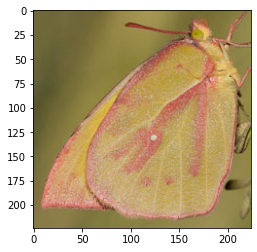

In [6]:
path = '/kaggle/input/lepidoptera-species-classification/test/'
rand = np.random.choice(os.listdir(path))
img = Image.open(path+rand)
plt.imshow(img)


Converting data into train and test


In [7]:
train = image_dataset_from_directory( '/kaggle/input/lepidoptera-species-classification/train',
                                   shuffle=True,seed=40,validation_split=0.25,
                                   subset='training',
                                   label_mode='categorical',
                                   batch_size=64, 
                                   image_size=(64, 64))

test = image_dataset_from_directory( '/kaggle/input/lepidoptera-species-classification/train',
                                   shuffle=False,validation_split=0.25,
                                   subset='validation',
                                   label_mode='categorical',
                                   batch_size=64, 
                                   image_size=(64, 64))

Found 12639 files belonging to 100 classes.
Using 9480 files for training.


2022-11-28 16:44:47.240886: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 12639 files belonging to 100 classes.
Using 3159 files for validation.


In [12]:
# Creating model
data=train.take(1)
for X,y in data:
    shape=X.shape
input_shape = shape[1:]

In [13]:
input_shape

TensorShape([64, 64, 3])

In [14]:
input_layer = layers.Input(shape = input_shape)


Making layers of network for traing and fitting the model

In [19]:
x1 = layers.Rescaling(1/255.)(input_layer)
x1 = layers.Conv2D(8, (3,3),activation = 'relu')(x1)
x1 = layers.Conv2D(8, (3,3), activation = 'relu')(x1)
x1 = layers.MaxPool2D((2,2))(x1)
    
x2 = layers.Conv2D(16, (3,3), activation = 'relu',padding = 'same')(x1)
x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(0.2)(x2)
    
x3 = layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x2)
x3 = layers.Dropout(0.2)(x2)
    
x4 = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x3)
x4 = layers.Dropout(0.2)(x4)

x5_ = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x4)
x5 = layers.MaxPool2D((2,2))(x5_)
x5 = layers.Dropout(0.2)(x5)

concat = layers.concatenate([x3, x4, x5_])
x6 = layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same')(concat)
x6 = layers.MaxPool2D((2,2))(x6)
x6 = layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x6)
x6 = layers.Dropout(0.2)(x6)
    
x7 = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x6)
x7 = layers.MaxPool2D((2,2))(x7)
x7 = layers.Dropout(0.2)(x7)

x8 = layers.Flatten()(x7)
x8 = layers.Dense(512, activation = 'relu')(x8)
x8 = layers.Dense(256, activation = 'relu')(x8)
x8 = layers.Dense(128, activation = 'relu')(x8)
x8 = layers.Dense(128, activation = 'relu')(x8)
x8 = layers.Dense(64, activation = 'relu')(x8)
classes = train.class_names
output = layers.Dense(len(classes), activation = 'softmax')(x8)

model_main = models.Model(input_layer, output)

In [20]:
model_main.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 64, 64, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 62, 62, 8)    224         rescaling_2[0][0]                
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 60, 60, 8)    584         conv2d_18[0][0]                  
____________________________________________________________________________________________

**Now we fouund the best model parameter so we train our model further on top of this******

In [21]:
model_main.compile(
loss = 'categorical_crossentropy',
metrics = ['accuracy'],
optimizer = 'Adam')

In [ ]:
history = model_main.fit(train,
                     epochs = 20,
                     steps_per_epoch = len(train),
                     validation_data = test,
                     validation_steps = int(0.2 * len(test)))

Epoch 1/20
149/149 [==============================] - 49s 317ms/step - loss: 4.5099 - accuracy: 0.0157 - val_loss: 4.3198 - val_accuracy: 0.0000e+00
Epoch 2/20
149/149 [==============================] - 44s 290ms/step - loss: 4.2020 - accuracy: 0.0308 - val_loss: 4.2308 - val_accuracy: 0.0000e+00
Epoch 3/20
149/149 [==============================] - 45s 298ms/step - loss: 3.9641 - accuracy: 0.0595 - val_loss: 3.5909 - val_accuracy: 0.2328
Epoch 4/20
149/149 [==============================] - 44s 295ms/step - loss: 3.7453 - accuracy: 0.0876 - val_loss: 3.2557 - val_accuracy: 0.2141
Epoch 5/20
149/149 [==============================] - 45s 302ms/step - loss: 3.5691 - accuracy: 0.1080 - val_loss: 3.3816 - val_accuracy: 0.1281
Epoch 6/20
149/149 [==============================] - 44s 293ms/step - loss: 3.4399 - accuracy: 0.1341 - val_loss: 3.0194 - val_accuracy: 0.2578
Epoch 7/20
149/149 [==============================] - 44s 292ms/step - loss: 3.2667 - accuracy: 0.1686 - val_loss: 2.8259 

In [ ]:
model_main.save(model.h5)